In [185]:
#librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import re

In [186]:
#cargar los datos
df = pd.read_csv("movies.csv", encoding="latin1")

# 1. Exploración de datos

In [187]:
#exploracion de los datos
#mostrar las columanas
print("\n--Columnas:---")
print(list(df.columns))

#resumen del set de datos
print("\n--Resumen del set de datos:--")
print(df.describe())



--Columnas:---
['id', 'budget', 'genres', 'homePage', 'productionCompany', 'productionCompanyCountry', 'productionCountry', 'revenue', 'runtime', 'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter', 'originalTitle', 'title', 'originalLanguage', 'popularity', 'releaseDate', 'voteAvg', 'voteCount', 'genresAmount', 'productionCoAmount', 'productionCountriesAmount', 'actorsAmount', 'castWomenAmount', 'castMenAmount']

--Resumen del set de datos:--
                  id        budget       revenue       runtime    popularity  \
count   10000.000000  1.000000e+04  1.000000e+04  10000.000000  10000.000000   
mean   249876.829300  1.855163e+07  5.673793e+07    100.268100     51.393907   
std    257380.109004  3.662669e+07  1.495854e+08     27.777829    216.729552   
min         5.000000  0.000000e+00  0.000000e+00      0.000000      4.258000   
25%     12286.500000  0.000000e+00  0.000000e+00     90.000000     14.577750   
50%    152558.000000  5.000000e+05  1.631245e+05    10

In [188]:
#obtener el tipo de datos
print("\n----Tipo de datos:---")
print(df.dtypes)
tipos_de_datos = df.dtypes.value_counts()
print('resumen:')
print(tipos_de_datos)



----Tipo de datos:---
id                             int64
budget                         int64
genres                        object
homePage                      object
productionCompany             object
productionCompanyCountry      object
productionCountry             object
revenue                      float64
runtime                        int64
video                         object
director                      object
actors                        object
actorsPopularity              object
actorsCharacter               object
originalTitle                 object
title                         object
originalLanguage              object
popularity                   float64
releaseDate                   object
voteAvg                      float64
voteCount                      int64
genresAmount                   int64
productionCoAmount             int64
productionCountriesAmount      int64
actorsAmount                   int64
castWomenAmount               object
castMenAmount  

---
# 2. Tipo de variables 

### Variables:
1. Id: Id de la película 

2. popularity: Índice de popularidad de la película calculado semanalmente 

3. budget: El presupuesto para la película. 

4. revenue: El ingreso de la película. 

5. original_title: El título original de la película, en su idioma original. 

6. originalLanguage: Idioma original en que se encuentra la película 

7. title: El título de la película traducido al inglés 

8. homePage: La página de inicio de la película 

9. video: Si tiene videos promocionales o no 

10. director: Director de la película 

11. runtime: La duración de la película. 

12. genres: El género de la película. 

13. genresAmount: Cantidad de géneros que representan la película 

14. productionCompany: Las compañías productoras de la película. 

15. productionCoAmount: Cantidad de compañías productoras que participaron en la película 

16. productionCompanyCountry: Países de las compañías productoras de la película 

17. productionCountry: Países en los que se llevó a cabo la producción de la película 

18. productionCountriesAmount: Cantidad de países en los que se rodó la película 


19. releaseDate: Fecha de lanzamiento de la película 

20. voteCount: El número de votos en la plataforma para la película. 

21. voteAvg: El promedio de los votos en la plataforma para la película 


22. actors: Actores que participan en la película (Elenco) 

23. actorsPopularity: Índice de popularidad del elenco de la película. 

24. actorsCharacter: Personaje que interpreta cada actor en la película 

25. actorsAmount: Cantidad de personas que actúan en la película 

26. castWomenAmount: Cantidad de actrices en el elenco de la película 

27. castMenAmount: Cantidad de actores en el elenco de la película. 

## Tipo de Varibles
### Variables Cualitativas:
#### Ordinales:
- No hay
 
#### Nominales:
- original_title
- originalLanguage
- title
- homePage
- director
- genres
- productionCompany
- productionCompanyCountry
- productionCountry
- video
- actors
- actorsCharacter


### Variables Cuantitativas:
#### Continuas:
- popularity
- revenue
- voteAvg


#### Discretas:
- Id
- releaseDate
- budget
- runtime
- genresAmount
- productionCoAmount
- productionCountriesAmount
- voteCount
- actorsPopularity
- actorsAmount
- castWomenAmount
- castMenAmount


In [189]:
# revision de valores duplicados
print(df.duplicated().sum())

0


In [190]:
# eliminar valores nulos o llenarlos con la media
df = df.dropna()

#llenar los valores nulos de video
df['video'].fillna('FALSE', inplace=True)

#calcular la media de solo las columnas numericas
mean_values = df.select_dtypes(include=[np.number]).mean()

#reemplazar valores nulos con la media
df.fillna(mean_values, inplace=True)


C:\Users\angel\AppData\Local\Temp\ipykernel_57456\2643670234.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['video'].fillna('FALSE', inplace=True)


In [191]:
#convertir los tipos de datos
#convertir la columna video a numerica
df['video'] = df['video'].apply(lambda x: 1 if str(x).upper() == 'TRUE' else 0)

#convertir la columna releaseDate a datetime
df['releaseDate'] = pd.to_datetime(df['releaseDate'])

#convertir las columnas popularity, revenue y voteAvg a enteros
df['popularity'] = df['popularity'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['voteAvg'] = df['voteAvg'].astype(int)

#asegurarse que todas las variables sean de tipo int
df['castWomenAmount'] = df['castWomenAmount'].astype(int)
df['castMenAmount'] = df['castMenAmount'].astype(int)

In [192]:
#limpiar los datos de la populariadad de actores
# Eliminar caracteres no numerricos y convertir a float e ignorar los nombres
def clean_popularity(popularity_list):
    numeric_values = []
    for value in popularity_list:
        try:
            numeric_values.append(float(re.sub(r'\D', '', value)))
        except ValueError:
            pass  # ignorar los xd
    return numeric_values

df['actorsPopularity'] = df['actorsPopularity'].str.split('|').apply(clean_popularity)

#promedio de popularidad
df['actorsPopularity_avg'] = df['actorsPopularity'].apply(lambda x: sum(x) / len(x) if x else 0)
print((df['actorsPopularity_avg']))

0       10386.160000
10       2820.183099
11       5757.305556
14       5035.864865
16       8124.315789
            ...     
9955       41.800000
9968     1706.625000
9979     8349.208333
9982    13318.918919
9988     6537.390244
Name: actorsPopularity_avg, Length: 3507, dtype: float64


In [193]:
#normalizacion de datos
#no se deben de normalizar todos los dato, entonces los de 
#nobmres de las columans que no se van a normalizar, porque no es necesario
#columans que si se van a normalizar
numeric_columns = ['actorsAmount', 'runtime']
print(numeric_columns)
#normalizar los datos
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df.head())


['actorsAmount', 'runtime']
    id     budget                    genres  \
0    5    4000000              Crime|Comedy   
10  22  140000000  Adventure|Fantasy|Action   
11  24   30000000              Action|Crime   
14  28   31500000                 Drama|War   
16  35   75000000   Animation|Comedy|Family   

                                             homePage  \
0           https://www.miramax.com/movie/four-rooms/   
10  http://disney.go.com/disneyvideos/liveaction/p...   
11    http://www.miramax.com/movie/kill-bill-volume-1   
14                       http://www.apocalypsenow.com   
16                      http://www.simpsonsmovie.com/   

                                    productionCompany  \
0                                Miramax|A Band Apart   
10       Walt Disney Pictures|Jerry Bruckheimer Films   
11                               Miramax|A Band Apart   
14                   United Artists|American Zoetrope   
16  AKOM Production Company|Gracie Films|Rough Dra...   

   

---
# 3. Distribución normal para variables cualitativas y cuantitativas

### Variables cualitativas
Verificar si tienen una distribución normal con la prueba de ***Kolmogorov - Smirnov***

**Popularity**

In [194]:
pop = df['popularity']

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(pop, 'norm', args=(np.mean(pop), np.std(pop)))

# Imprimir los resultados
print("Estadístico de prueba (ks_statistic) = %.20f" % ks_statistic)
print("p-value = %.20f" % p_value)

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: los datos parecen provenir de una distribución normal.")

Estadístico de prueba (ks_statistic) = 0.42594086300522038258
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.


**Revenue**

In [195]:
rev = df['revenue']

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(rev, 'norm', args=(np.mean(rev), np.std(rev)))

# Imprimir los resultados
print("Estadístico de prueba (ks_statistic) = %.20f" % ks_statistic)
print("p-value = %.20f" % p_value)

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: los datos parecen provenir de una distribución normal.")

Estadístico de prueba (ks_statistic) = 0.32992306067409948866
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.


**Budget**

In [196]:
b = df['budget']

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(b, 'norm', args=(np.mean(b), np.std(b)))

# Imprimir los resultados
print("Estadístico de prueba (ks_statistic) = %.20f" % ks_statistic)
print("p-value = %.20f" % p_value)

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: los datos parecen provenir de una distribución normal.")

Estadístico de prueba (ks_statistic) = 0.27983203336928369476
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.


In [197]:
b = df['runtime']

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(b, 'norm', args=(np.mean(b), np.std(b)))

# Imprimir los resultados
print("Estadístico de prueba (ks_statistic) = %.20f" % ks_statistic)
print("p-value = %.20f" % p_value)

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: los datos parecen provenir de una distribución normal.")

Estadístico de prueba (ks_statistic) = 0.09227014544450236333
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.


In [198]:
b = df['genresAmount']

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(b, 'norm', args=(np.mean(b), np.std(b)))

# Imprimir los resultados
print("Estadístico de prueba (ks_statistic) = %.20f" % ks_statistic)
print("p-value = %.20f" % p_value)

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: los datos parecen provenir de una distribución normal.")

Estadístico de prueba (ks_statistic) = 0.18398242605677350703
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.


In [199]:
b = df['productionCoAmount']

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(b, 'norm', args=(np.mean(b), np.std(b)))

# Imprimir los resultados
print("Estadístico de prueba (ks_statistic) = %.20f" % ks_statistic)
print("p-value = %.20f" % p_value)

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: los datos parecen provenir de una distribución normal.")

Estadístico de prueba (ks_statistic) = 0.17934240487760050309
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.


In [200]:
b = df['voteCount']

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(b, 'norm', args=(np.mean(b), np.std(b)))

# Imprimir los resultados
print("Estadístico de prueba (ks_statistic) = %.20f" % ks_statistic)
print("p-value = %.20f" % p_value)

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: los datos parecen provenir de una distribución normal.")

Estadístico de prueba (ks_statistic) = 0.26935561045230149713
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.


In [201]:
b = df['actorsAmount']

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(b, 'norm', args=(np.mean(b), np.std(b)))

# Imprimir los resultados
print("Estadístico de prueba (ks_statistic) = %.20f" % ks_statistic)
print("p-value = %.20f" % p_value)

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: los datos parecen provenir de una distribución normal.")

Estadístico de prueba (ks_statistic) = 0.13406608230759553546
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.


### Variables cualitativas

C:\Users\angel\AppData\Local\Temp\ipykernel_57456\3953418311.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, ax=axes[i], palette="coolwarm")
C:\Users\angel\AppData\Local\Temp\ipykernel_57456\3953418311.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, ax=axes[i], palette="coolwarm")
C:\Users\angel\AppData\Local\Temp\ipykernel_57456\3953418311.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.i

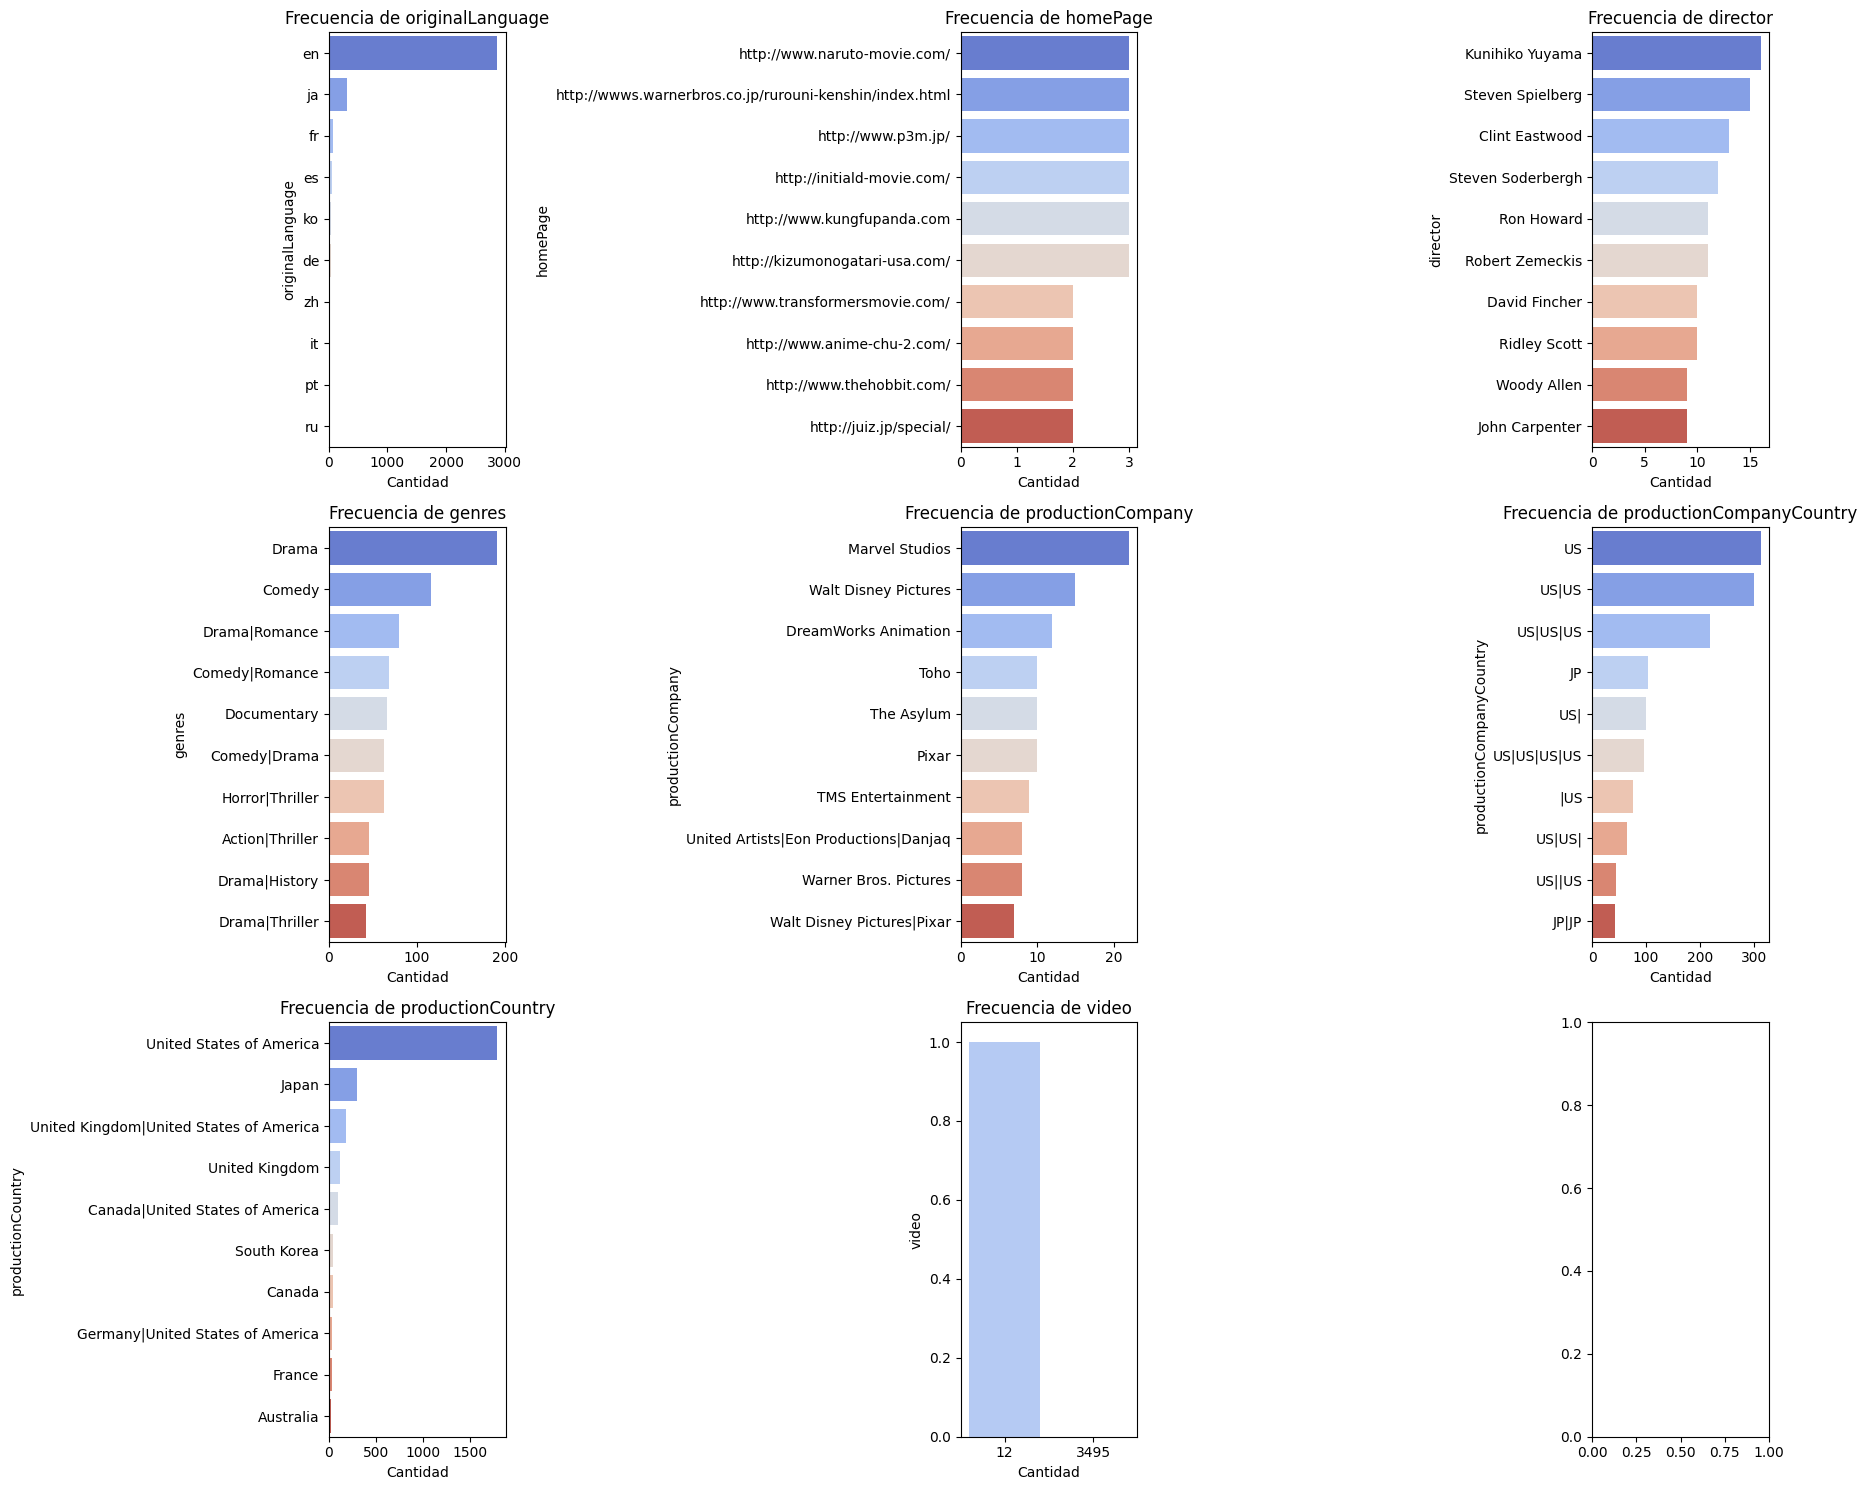

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables categóricas nominales
categorical_vars = [
    "originalLanguage", "homePage", "director", "genres", "productionCompany",
    "productionCompanyCountry", "productionCountry", "video"
]

# Definir el número de filas y columnas para la visualización
num_vars = len(categorical_vars)
num_cols = 3  # Número de columnas en la figura
num_rows = -(-num_vars // num_cols)  # Redondeo hacia arriba para obtener el número de filas

# Crear figura con subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
axes = axes.flatten()  # Aplanar la matriz de ejes

# Generar gráficos de barras para cada variable categórica
for i, var in enumerate(categorical_vars):
    # Contar las 10 categorías más frecuentes para evitar gráficos sobrecargados
    top_categories = df[var].value_counts().head(10)
    
    # Graficar solo si hay datos en la variable
    if not top_categories.empty:
        sns.barplot(x=top_categories.values, y=top_categories.index, ax=axes[i], palette="coolwarm")
        axes[i].set_title(f"Frecuencia de {var}")
        axes[i].set_xlabel("Cantidad")
        axes[i].set_ylabel(var)

# Ajustar el diseño para evitar superposición
plt.tight_layout()
plt.show()


---
## 4. Preguntas a responder 

a. **¿Cuáles son las 10 películas que contaron con más presupuesto?**

In [203]:
top10 = df.sort_values(by="budget", ascending=False).head(10)
print(top10[['title', 'budget']])

                                             title     budget
716    Pirates of the Caribbean: On Stranger Tides  380000000
4710                       Avengers: Age of Ultron  365000000
5952                             Avengers: Endgame  356000000
163       Pirates of the Caribbean: At World's End  300000000
5953                        Avengers: Infinity War  300000000
607                               Superman Returns  270000000
7134                                 The Lion King  260000000
280                                   Spider-Man 3  258000000
4855     The Hobbit: The Battle of the Five Armies  250000000
2508  Harry Potter and the Deathly Hallows: Part 1  250000000


### b. ¿Cuáles son las 10 películas que más ingresos tuvieron?

In [204]:
#--------------------------------------------
# b. ¿Cuáles son las 10 películas que más ingresos tuvieron?
ingresos = df.sort_values(by='revenue', ascending=False)
print('\nTop 10 películas con mas ingresos: ')
print(ingresos[['title', 'revenue']].head(10))



Top 10 películas con mas ingresos: 
                        title     revenue
3210                   Avatar  2847246203
5952        Avengers: Endgame  2797800564
5953   Avengers: Infinity War  2046239637
7134            The Lion King  1667635327
9049  Spider-Man: No Way Home  1631853496
3397             The Avengers  1518815515
5087                Furious 7  1515047671
6180                Frozen II  1450026933
4710  Avengers: Age of Ultron  1405403694
5798            Black Panther  1346739107


**c.  ¿Cuál es la película que más votos tuvo?**

In [205]:
masVotada = df.sort_values(by='voteCount', ascending=False).iloc[0]
print(f'La película con más votos es "{masVotada["title"]}" con {masVotada["voteCount"]} votos.')

La película con más votos es "Inception" con 30788 votos.


### d. ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?

In [206]:
# d. ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?
peor = df.sort_values(by='voteAvg', ascending=True)
print('\nPeor pelicula segun los votos de todos los usuarios es: ')
print(peor[['title', 'voteAvg']].head(1))



Peor pelicula segun los votos de todos los usuarios es: 
                                                  title  voteAvg
9786  DAKAICHI -I'm Being Harassed by the Sexiest Ma...        1


**e. ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más
películas? Haga un gráfico de barras**

El año con más películas fue 2021 con 333 películas.


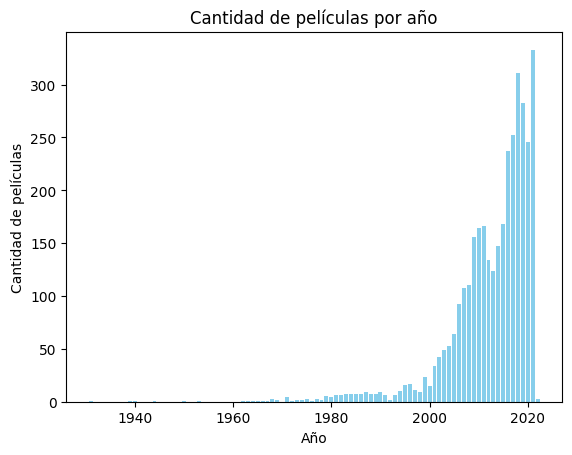

In [207]:


# Convertir la columna de fecha de lanzamiento a tipo datetime para poder manejar los datos despues 
df["releaseDate"] = pd.to_datetime(df["releaseDate"], errors="coerce")
df["year"] = df["releaseDate"].dt.year

# Contar cuántas películas se hicieron en cada año
pelis_anio = df["year"].value_counts().sort_index()

# Encontrar el año con más películas
max_year = pelis_anio.idxmax()
max_movies = pelis_anio.max()

print(f'El año con más películas fue {max_year} con {max_movies} películas.')

# Graficar la cantidad de películas por año
plt.bar(pelis_anio.index, pelis_anio.values, color="skyblue")
plt.xlabel("Año")
plt.ylabel("Cantidad de películas")
plt.title("Cantidad de películas por año")

# Mostrar el gráfico
plt.show()


#### f. ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos?  Represéntelo usando un gráfico.  ¿A qué género principal pertenecen las películas más largas?

Top generos:
genres
Drama              6
Comedy             5
Action             2
Science Fiction    2
Documentary        1
Thriller           1
Animation          1
Romance            1
Family             1
Name: count, dtype: int64


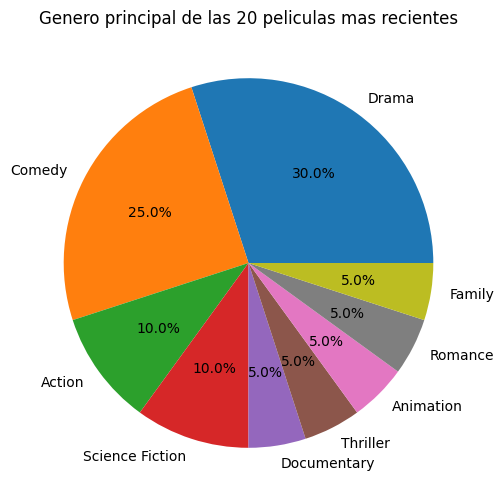

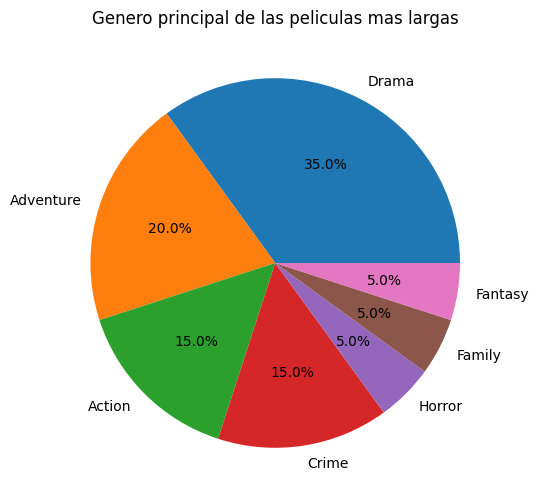

In [208]:
#--------------------------------
'''
f.
¿Cuál es el género principal de las 20 películas más recientes?
¿Cuál es el género principal que predomina en el conjunto de datos?
 Represéntelo usando un gráfico.
 ¿A qué género principal pertenecen las películas más largas?
'''
#¿Cuál es el género principal de las 20 películas más recientes?
peliculas_recientes = df.sort_values(by='releaseDate', ascending=False)
top_20 = peliculas_recientes.head(20)
generos_top20= top_20['genres'].str.split('|').str[0]
generos_top20= generos_top20.value_counts()
print("Top generos:")
print(generos_top20)
nombres_generos= generos_top20.index
# print(nombres_generos)

#grafica
plt.figure(figsize=(10, 6))
plt.pie(generos_top20, labels=nombres_generos, autopct='%1.1f%%')
plt.title('Genero principal de las 20 peliculas mas recientes')
plt.show()

#¿A qué género principal pertenecen las películas más largas?
peliculas_mas_largas= df.sort_values(by='runtime', ascending=False)
top_20_pl = peliculas_mas_largas.head(20)
generos_pl = top_20_pl['genres'].str.split('|').str[0]
generos_pl = generos_pl.value_counts()
nombres_generos_pl = generos_pl.index

#grafica
plt.figure(figsize=(10, 6))
plt.pie(generos_pl, labels=nombres_generos_pl, autopct='%1.1f%%')
plt.title('Genero principal de las peliculas mas largas')
plt.show()



Como se puede ver en ambas graficas, el genero principal es el de Drama

**g. ¿Las películas de qué genero principal obtuvieron mayores ganancias?**

In [209]:
df["profit"] = df["revenue"] - df["budget"]

df["main_genre"] = df["genres"].str.split(",").str[0]

# Agrupar por género principal y sumar las ganancias
genre_profits = df.groupby("main_genre")["profit"].sum().sort_values(ascending=False)

# Encontrar el género con mayores ganancias
top_genre = genre_profits.idxmax()
top_profit = genre_profits.max()    

print(f'El género con mayores ganancias es "{top_genre}" con un total de ${top_profit:,.2f}.')


El género con mayores ganancias es "Action|Adventure|Science Fiction" con un total de $10,579,190,399.00.


#### h. ¿La cantidad de actores influye en los ingresos de las películas? ¿Se han hecho películas con más actores en los últimos años?

              actorsAmount   revenue
actorsAmount      1.000000  0.391464
revenue           0.391464  1.000000


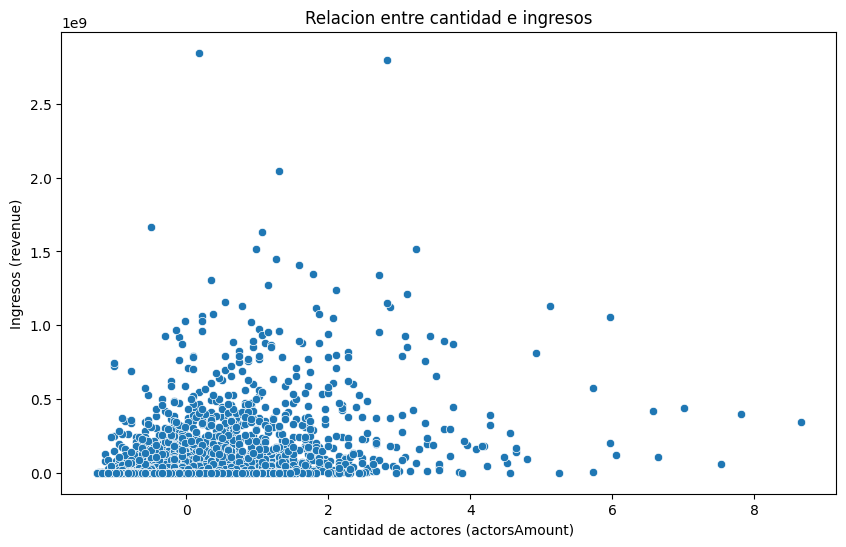

La grafica nos da una aproximacion de la relacion de la cantidad de actores y el ingreso, pero se necesita un analisis mas profundo y tomar en cuenta otras variables para determinar si la cantidad de actores influye en los ingresos de las peliculas
          id     budget                         genres  \
110      189   65000000          Crime|Action|Thriller   
739     1930  215000000       Action|Adventure|Fantasy   
1874   10317   28000000                   Comedy|Drama   
2007   10679    7500000  Action|Comedy|Science Fiction   
2820   14564   25000000                         Horror   
...      ...        ...                            ...   
9955  885110     250000              War|History|Drama   
9968  892342          0                  Romance|Drama   
9979  896633          0              Music|Documentary   
9982  899082          0                    Documentary   
9988  911068          0                         Comedy   

                                               homePag

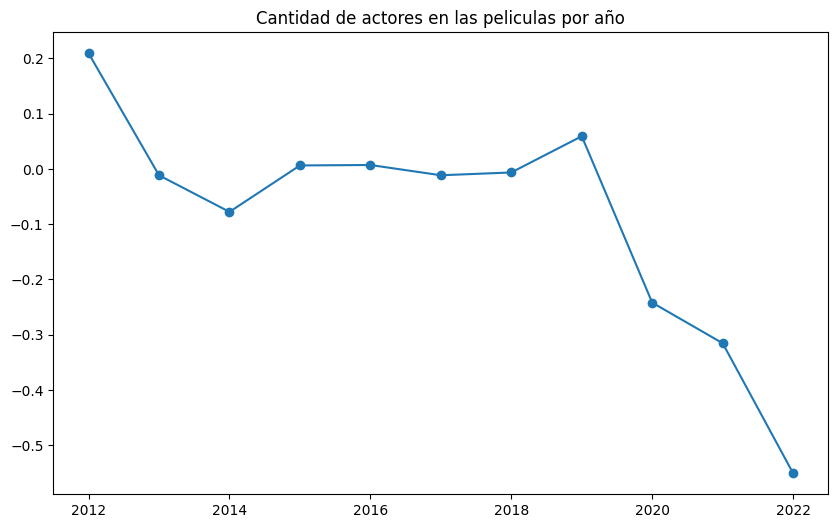

Como se puede ver en la grafica, definitivamente desde el 2019 bajo la cantidad de actores, por lo que se descarta que se han hecho peliculas con mas actores en los ultimos anios


In [210]:
'''h.
¿La cantidad de actores influye en los ingresos de las películas?
¿Se han hecho películas con más actores en los últimos años?
'''
#cantidad de actores influye en los ingresos de las películas
#correlacion de 
correlacion_actores_ingresos = df[['actorsAmount', 'revenue']].corr()
print(correlacion_actores_ingresos)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='actorsAmount', y='revenue', data=df)
plt.xlabel('cantidad de actores (actorsAmount)')
plt.ylabel('Ingresos (revenue)')
plt.title('Relacion entre cantidad e ingresos')
plt.show()
print('La grafica nos da una aproximacion de la relacion de la cantidad de actores y el ingreso, pero se necesita un analisis mas profundo y tomar en cuenta otras variables para determinar si la cantidad de actores influye en los ingresos de las peliculas')


#anio mas reciente
anio_mas_reciente = df['releaseDate'].dt.year.max()
#filtrar los ultimos 10 a;os porque son los mas recientes
peliculas_5_ultimos_anios = df[df['releaseDate'].dt.year >= anio_mas_reciente - 10]

print(peliculas_5_ultimos_anios)

anios = []
cantidad_actores_anio = []
for anio, grupo in peliculas_5_ultimos_anios.groupby(peliculas_5_ultimos_anios['releaseDate'].dt.year):
    # print(anio)
    # print(grupo)
    #canidad de actores por a;o
    cantidad_actores = grupo['actorsAmount'] # grupo['castWomenAmount'] + grupo['castMenAmount']
    anios.append(anio)
    cantidad_actores_anio.append(cantidad_actores.mean())
    #print("Año:" + str(anio)+ " Cantidad de actores: " + str(sum(cantidad_actores)))
print(anios)
print(cantidad_actores_anio)

#grafica
plt.figure(figsize=(10, 6))
plt.plot(anios, cantidad_actores_anio, marker='o')
plt.title('Cantidad de actores en las peliculas por año')
plt.show()
print("Como se puede ver en la grafica, definitivamente desde el 2019 bajo la cantidad de actores, por lo que se descarta que se han hecho peliculas con mas actores en los ultimos anios")


En la primera grafica nos da una aproximacion de la relacion de la cantidad de actores y el ingreso, pero se necesita un analisis mas profundo y tomar en cuenta otras variables para determinar si la cantidad de actores influye en los ingresos de las peliculas.

En la segunda grafica lo que se observa es que definitivamente desde el 2019 bajo la cantidad de actores, por lo que se descarta que se han hecho peliculas con mas actores en los ultimos anios

**i. ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?**

In [211]:

# Asegurar que las columnas sean numéricas
df["castWomenAmount"] = pd.to_numeric(df["castWomenAmount"], errors="coerce")
df["castMenAmount"] = pd.to_numeric(df["castMenAmount"], errors="coerce")
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce")
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")

# Calcular correlaciones
correlations = df[["castWomenAmount", "castMenAmount", "popularity", "revenue"]].corr()
print(correlations)


                 castWomenAmount  castMenAmount  popularity   revenue
castWomenAmount         1.000000       0.507684    0.048948  0.258699
castMenAmount           0.507684       1.000000    0.070101  0.463545
popularity              0.048948       0.070101    1.000000  0.188719
revenue                 0.258699       0.463545    0.188719  1.000000


Se puede observar que hay una correlación un poco más alta para los ingresos para los hombres que con las mujeres, entonces puede que aqui haya un sesgo, no es una gran diferencia, pero no deja de ser significativo. Se usó esta método para ver la correlación entre las variables 

#### j. ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

In [212]:
'''j.
¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

'''
print("El listado de directores y con las 20 peliculas mejor calificadas es:\n")
peliculas_mejores_calificadas = df.sort_values(by='voteAvg', ascending=False).head(20)
for i, row in peliculas_mejores_calificadas.iterrows():
    print('director : '+str(row['director']) + '    | pelicula : '+str(row['title']))


El listado de directores y con las 20 peliculas mejor calificadas es:

director : Park Jun-soo    | pelicula : Bring the Soul: The Movie
director : Park Jun-soo    | pelicula : Break the Silence: The Movie
director : Lin-Manuel Miranda    | pelicula : tick, tick BOOM!
director : Martin Scorsese    | pelicula : GoodFellas
director : Roger Allers|Rob Minkoff    | pelicula : The Lion King
director : Eran Creevy|Giorgio Testi|Joe Pearlman|Casey Patterson    | pelicula : Harry Potter 20th Anniversary: Return to Hogwarts
director : Destin Daniel Cretton    | pelicula : Just Mercy
director : Paul Dugdale    | pelicula : ariana grande: excuse me, i love you
director : Mamoru Hosoda    | pelicula : Belle
director : Robert Rodriguez|Patrick Osborne    | pelicula : Happier Than Ever: A Love Letter to Los Angeles
director : Thor Freudenthal    | pelicula : Words on Bathroom Walls
director : Irvin Kershner    | pelicula : The Empire Strikes Back
director : Joe Wright    | pelicula : Pride & Prejud

**k. ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión**

           budget   revenue
budget   1.000000  0.756028
revenue  0.756028  1.000000


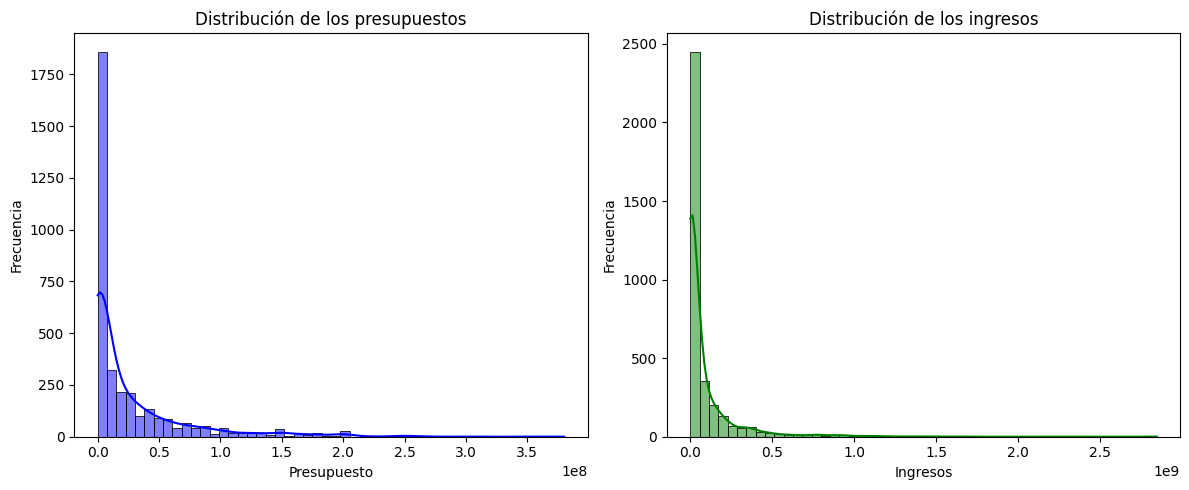

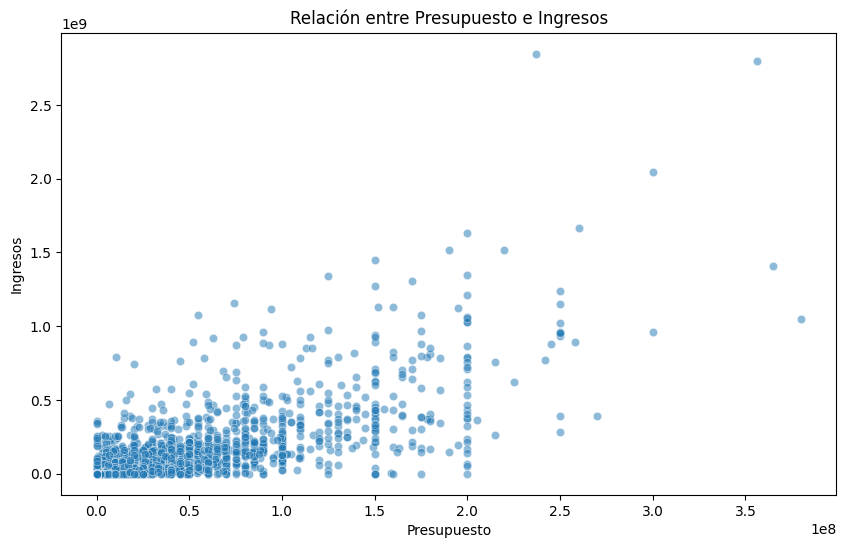

In [213]:
import seaborn as sns

# Asegurar que las columnas sean numéricas
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")

# Calcular correlación
correlation = df[["budget", "revenue"]].corr()
print(correlation)
plt.figure(figsize=(12, 5))

# Histograma de presupuesto
plt.subplot(1, 2, 1)
sns.histplot(df["budget"], bins=50, kde=True, color="blue")
plt.xlabel("Presupuesto")
plt.ylabel("Frecuencia")
plt.title("Distribución de los presupuestos")

# Histograma de ingresos
plt.subplot(1, 2, 2)
sns.histplot(df["revenue"], bins=50, kde=True, color="green")
plt.xlabel("Ingresos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los ingresos")

plt.tight_layout()
plt.show()

# diagrama de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["budget"], y=df["revenue"], alpha=0.5)
plt.xlabel("Presupuesto")
plt.ylabel("Ingresos")
plt.title("Relación entre Presupuesto e Ingresos")
plt.show()


Se puede concluir que si hay una relación en la mayoría de casos, pero hay datos atípicos que sesgan la correlación entre las variables. Como la correlación no es mayor a 0.7, no se puede asegurar que en todos los casos mientras mas presupuesto haya, más ganancias habrá, pero si hay casos en los que esto se cumplirá. 

#### l. ¿Se asocian ciertos meses de lanzamiento con mejores ingresos? 

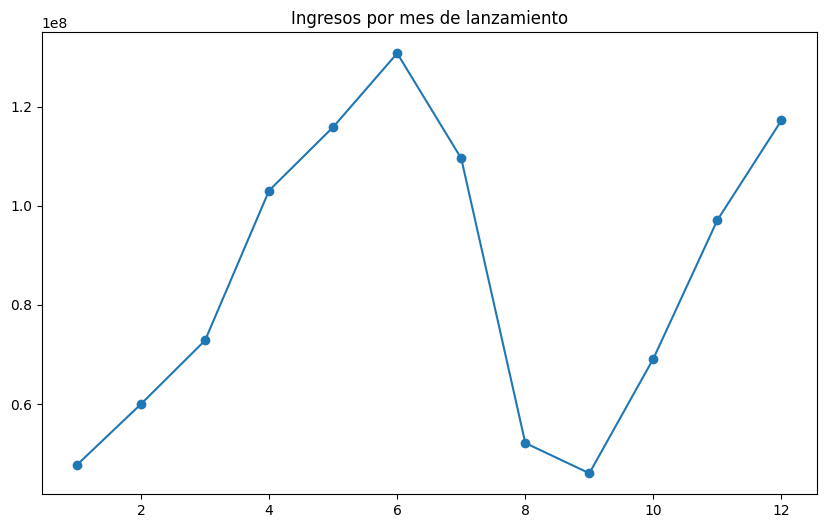

parece que se ingresos por mes de lanzamiento si se pueden asociar con los meses de lanzamiento, como se puede ver que el mes con mas ingresos ha sido junio y el peor septiembre


In [214]:
'''l.
¿Se asocian ciertos meses de lanzamiento con mejores ingresos? 

'''
#meses de lanzamiento 
meses_de_lanzamiento = df['releaseDate'].dt.month

#agrupar por mes y calcular promedio de ingresos
ingresos_por_mes = df.groupby(meses_de_lanzamiento)['revenue'].mean()

#grafica
plt.figure(figsize=(10, 6))
plt.plot(ingresos_por_mes.index, ingresos_por_mes, marker='o')
plt.title('Ingresos por mes de lanzamiento')
plt.show()
print('parece que se ingresos por mes de lanzamiento si se pueden asociar con los meses de lanzamiento, como se puede ver que el mes con mas ingresos ha sido junio y el peor septiembre')

Parece que se ingresos por mes de lanzamiento si se pueden asociar con los meses de lanzamiento, como se puede ver que el mes con mas ingresos ha sido junio y el peor septiembre

**m. ¿En qué meses se han visto los lanzamientos con mejores ingresos?¿Cuántas películas, en promedio, se han lanzado por mes?**

month
6     1.307890e+08
12    1.172626e+08
5     1.158890e+08
7     1.095607e+08
4     1.030863e+08
11    9.713746e+07
3     7.282052e+07
10    6.915801e+07
2     5.998028e+07
8     5.211725e+07
1     4.769361e+07
9     4.600697e+07
Name: revenue, dtype: float64


C:\Users\angel\AppData\Local\Temp\ipykernel_57456\3688588892.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="viridis")


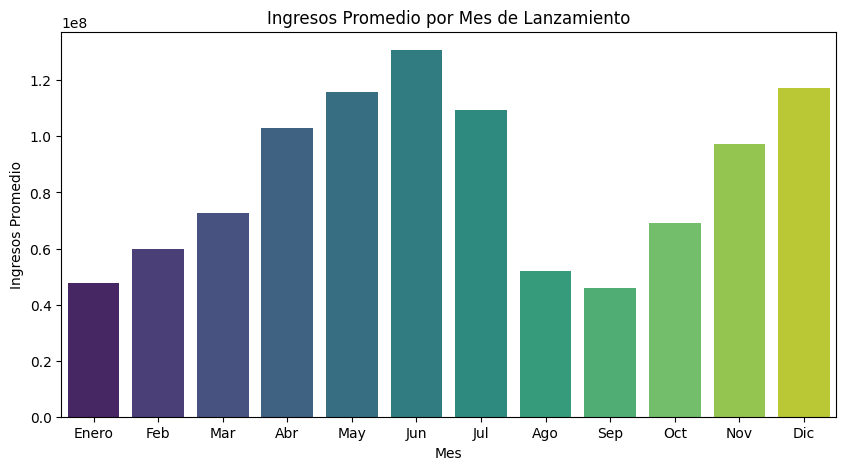

In [215]:
# en que meses se han visto lanzamientos con mejor ingreso 

df["month"] = df["releaseDate"].dt.month
# Calcular el ingreso promedio por mes
monthly_revenue = df.groupby("month")["revenue"].mean().sort_values(ascending=False)

print(monthly_revenue)
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="viridis")
plt.xlabel("Mes")
plt.ylabel("Ingresos Promedio")
plt.title("Ingresos Promedio por Mes de Lanzamiento")
plt.xticks(ticks=range(0, 12), labels=["Enero", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.show()



En promedio, se lanzan 292.25 películas por mes.


C:\Users\angel\AppData\Local\Temp\ipykernel_57456\2263123677.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_count.index, y=monthly_count.values, palette="viridis")


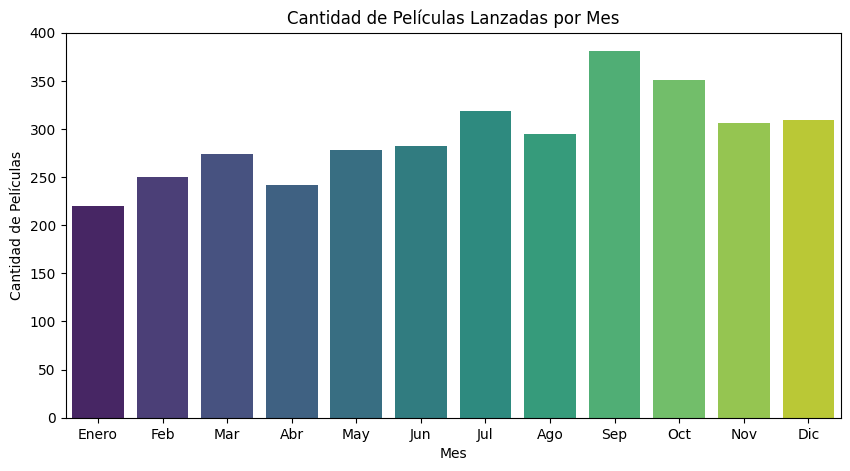

In [216]:
monthly_count = df["month"].value_counts().sort_index()
avg_movies_per_month = monthly_count.mean()

print(f"En promedio, se lanzan {avg_movies_per_month:.2f} películas por mes.")
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_count.index, y=monthly_count.values, palette="viridis")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Películas")
plt.title("Cantidad de Películas Lanzadas por Mes")
plt.xticks(ticks=range(0, 12), labels=["Enero", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.show()


### n.¿Cómo se correlacionan las calificaciones con el éxito comercial?

          voteAvg   revenue
voteAvg  1.000000  0.155181
revenue  0.155181  1.000000


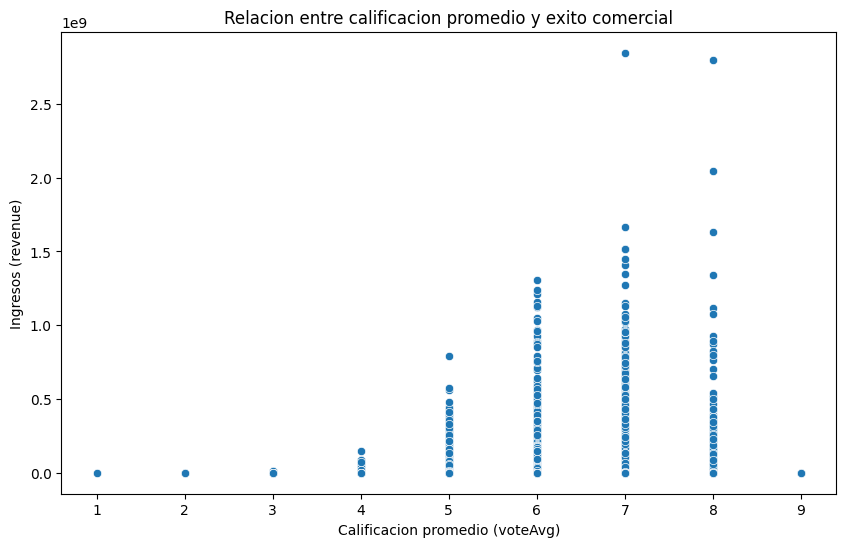

parece que a medida que sube la calificacion promedio, tambien aumentan los ingresos, aunque no es una relacion muy fuerte y los datos estan bastante dispersos.


In [217]:
# '''n.
# ¿Cómo se correlacionan las calificaciones con el éxito comercial?
# '''
correlacion_vote_revenue = df[['voteAvg', 'revenue']].corr()
print(correlacion_vote_revenue)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='voteAvg', y='revenue', data=df)
plt.xlabel('Calificacion promedio (voteAvg)')
plt.ylabel('Ingresos (revenue)')
plt.title('Relacion entre calificacion promedio y exito comercial')
plt.show()
print('parece que a medida que sube la calificacion promedio, tambien aumentan los ingresos, aunque no es una relacion muy fuerte y los datos estan bastante dispersos.')


parece que a medida que sube la calificacion promedio, tambien aumentan los ingresos, aunque no es una relacion muy fuerte y los datos estan bastante dispersos.

**o. ¿Qué estrategias de marketing, como videos promocionales o páginasoficiales, generan mejores resultados?**

Impacto de los videos promocionales:
                 revenue  popularity
has_video                          
0          8.513754e+07   70.317310
1          1.425658e+06   81.583333

Impacto de tener una página oficial:
                    revenue  popularity
has_homepage                          
1             8.485110e+07    70.35586


C:\Users\angel\AppData\Local\Temp\ipykernel_57456\2562232474.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=video_impact.index, y=video_impact["revenue"], palette="Blues")
C:\Users\angel\AppData\Local\Temp\ipykernel_57456\2562232474.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=video_impact.index, y=video_impact["popularity"], palette="Greens")


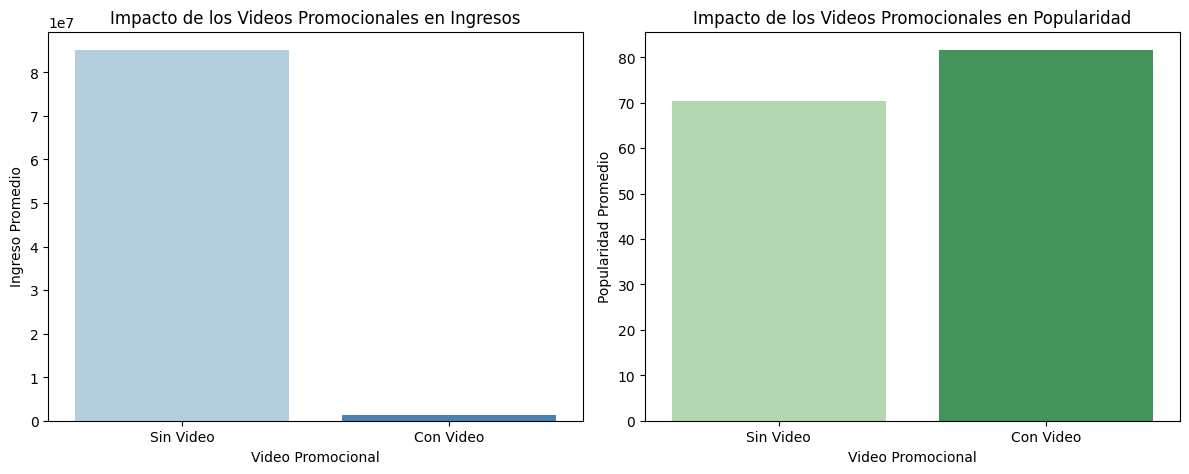

C:\Users\angel\AppData\Local\Temp\ipykernel_57456\2562232474.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=homepage_impact.index, y=homepage_impact["revenue"], palette="Purples")
C:\Users\angel\AppData\Local\Temp\ipykernel_57456\2562232474.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=homepage_impact.index, y=homepage_impact["popularity"], palette="Oranges")


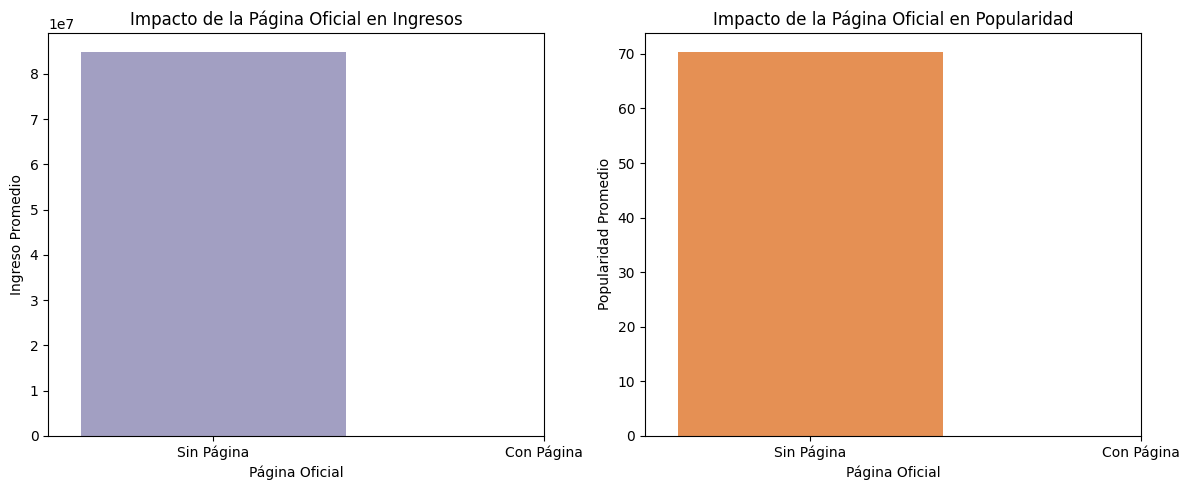

In [218]:
# Crear columnas binarias (1 = tiene, 0 = no tiene)
df["has_video"] = df["video"].astype(bool).astype(int)
df["has_homepage"] = df["homePage"].notnull().astype(int)
# Agrupar por si tiene o no videos promocionales
video_impact = df.groupby("has_video")[["revenue", "popularity"]].mean()
homepage_impact = df.groupby("has_homepage")[["revenue", "popularity"]].mean()

print("Impacto de los videos promocionales:\n", video_impact)
print("\nImpacto de tener una página oficial:\n", homepage_impact)

# Gráfico para videos promocionales
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=video_impact.index, y=video_impact["revenue"], palette="Blues")
plt.xticks([0, 1], ["Sin Video", "Con Video"])
plt.xlabel("Video Promocional")
plt.ylabel("Ingreso Promedio")
plt.title("Impacto de los Videos Promocionales en Ingresos")

plt.subplot(1, 2, 2)
sns.barplot(x=video_impact.index, y=video_impact["popularity"], palette="Greens")
plt.xticks([0, 1], ["Sin Video", "Con Video"])
plt.xlabel("Video Promocional")
plt.ylabel("Popularidad Promedio")
plt.title("Impacto de los Videos Promocionales en Popularidad")

plt.tight_layout()
plt.show()

# Gráfico para páginas oficiales
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=homepage_impact.index, y=homepage_impact["revenue"], palette="Purples")
plt.xticks([0, 1], ["Sin Página", "Con Página"])
plt.xlabel("Página Oficial")
plt.ylabel("Ingreso Promedio")
plt.title("Impacto de la Página Oficial en Ingresos")

plt.subplot(1, 2, 2)
sns.barplot(x=homepage_impact.index, y=homepage_impact["popularity"], palette="Oranges")
plt.xticks([0, 1], ["Sin Página", "Con Página"])
plt.xlabel("Página Oficial")
plt.ylabel("Popularidad Promedio")
plt.title("Impacto de la Página Oficial en Popularidad")

plt.tight_layout()
plt.show()


#### p. ¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?

                      actorsPopularity_avg  revenue
actorsPopularity_avg               1.00000  0.10745
revenue                            0.10745  1.00000


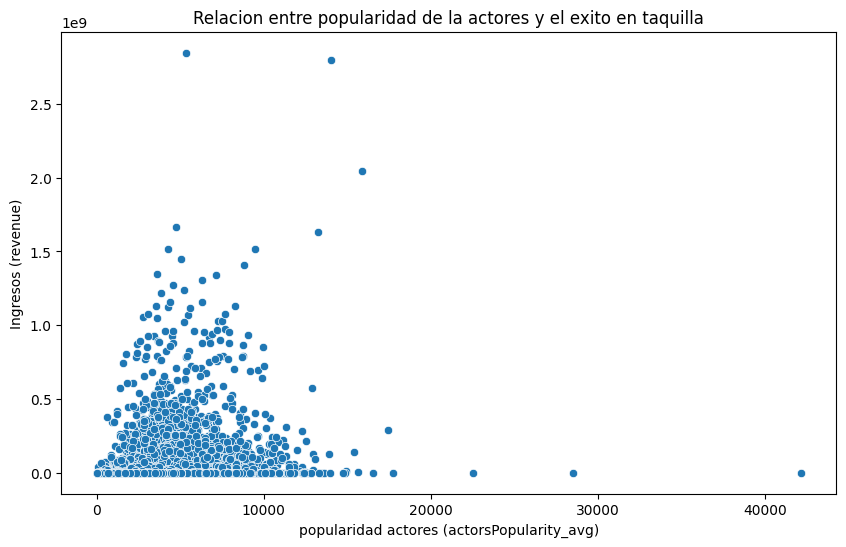

La grafica nos da una aproximacion de la relacion de la popularidad de los actores y el exito en la taquilla, pero se necesita un analisis mas profundo y tomar en cuenta otras variables para determinar si la popularidad del elenco esta directamente correlacionada con el exito de taquilla


In [219]:
'''p.
¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?
'''

correlacion_apopularity_revenue = df[['actorsPopularity_avg', 'revenue']].corr()
print(correlacion_apopularity_revenue)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='actorsPopularity_avg', y='revenue', data=df)
plt.xlabel('popularidad actores (actorsPopularity_avg)')
plt.ylabel('Ingresos (revenue)')
plt.title('Relacion entre popularidad de la actores y el exito en taquilla')
plt.show()
print('La grafica nos da una aproximacion de la relacion de la popularidad de los actores y el exito en la taquilla, pero se necesita un analisis mas profundo y tomar en cuenta otras variables para determinar si la popularidad del elenco esta directamente correlacionada con el exito de taquilla')


La grafica nos da una aproximacion de la relacion de la popularidad de los actores y el exito en la taquilla, pero se necesita un analisis mas profundo y tomar en cuenta otras variables para determinar si la popularidad del elenco esta directamente correlacionada con el exito de taquilla